In [20]:
import gym
import matplotlib.pyplot as plt
import collections

### value-iteration method

In [21]:
def play_random_steps(environ,t_count, reward_table, transit_table):
    s = env.reset()
    for _ in range(t_count):
        a = environ.action_space.sample()
        ns, r, done, info = environ.step(a)
        reward_table[(s,a,ns)] = r #
        transit_table[(s,a)][ns] += 1
        s = env.reset() if done else ns

def cal_action_value(transit_table, reward_table, value_table,state, action):
    target_count = transit_table[(state, action)]
    total = sum(target_count.values())
    action_value = 0.
    for tgt_state, count in target_count.items():
        reward = reward_table[(state, action, tgt_state)]
        action_value += (count/total) * (reward + gamma*value_table[tgt_state])
    return action_value

def select_action(environ,transit_table, reward_table, value_table, state):
    best_action, best_value = None, None
    
    for action in range(environ.action_space.n):
        # q value를 그때그때 계산해서 최댓값인 a를 액션으로 선택함 --> q learing과 차이/ qlenaring은 qvalue자체를 학습함
        action_value = cal_action_value(transit_table, reward_table, value_table,state, action)
        if best_value is None or best_value < action_value:
            best_value = action_value
            best_action = action
    
    return best_action

def play_episode(environ, transit_table, reward_table, value_table):
    total_reward = 0.
    s = environ.reset()
    while True:
        a = select_action(environ,transit_table, reward_table, value_table, s)
        ns, r, done, info = environ.step(a)
        reward_table[(s, a, ns)] = r
        transit_table[(s,a)][ns] += 1
        total_reward += r
        if done:
            break
        s = ns
    return total_reward

def value_iteration(environ,transit_table, reward_table, value_table,):
    for state in range(environ.observation_space.n):
        q_value_list = [cal_action_value(transit_table, reward_table, value_table,state, action) for action in range(environ.action_space.n)]
        value_table[state] = max(q_value_list)  # maxq = v

In [22]:
%%time
# action = 0 or 1 or 2 or 3
# reward는 도착을해야만 1을 받음 나머지는 0
# state는 0~16까지
env = gym.make("FrozenLake-v1", is_slippery = True)
# env.render()
gamma = 0.9
n_test_episode = 20
n_random_valueiter = 100

reward_table = collections.defaultdict(float)
transit_table = collections.defaultdict(collections.Counter)
value_table = collections.defaultdict(float)

r_cum = []
iter_no = 0
best_reward = 0.
while True:
    iter_no += 1
    play_random_steps(env, n_random_valueiter, reward_table, transit_table)
    value_iteration(env, transit_table, reward_table, value_table,)
    reward = 0
    for _ in range(n_test_episode):
        reward += play_episode(env, transit_table, reward_table,value_table)
    reward /= n_test_episode
    r_cum.append(reward)
    if reward > best_reward:
        print(f"best reward updated {best_reward} --> {reward}")
        best_reward = reward
    if reward > 0.8:
        print(f"solved in {iter_no} iterations!")
        break
    # print(f"iteration: {iter_no}, best_reward: {best_reward}")


best reward updated 0.0 --> 0.25
best reward updated 0.25 --> 0.5
best reward updated 0.5 --> 0.65
best reward updated 0.65 --> 0.8
best reward updated 0.8 --> 0.85
solved in 28 iterations!
CPU times: total: 250 ms
Wall time: 255 ms


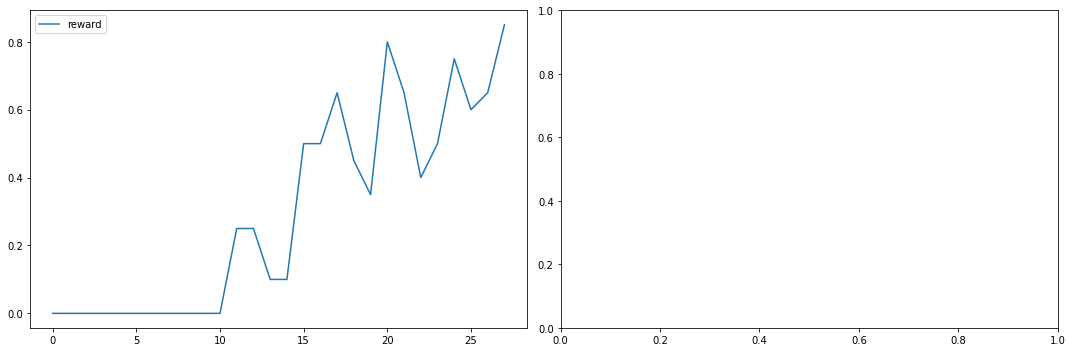

In [23]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(r_cum, label='reward')
axes[0].legend()
fig.tight_layout()

In [24]:
reward_table

defaultdict(float,
            {(0, 2, 1): 0.0,
             (1, 2, 5): 0.0,
             (0, 3, 1): 0.0,
             (1, 2, 2): 0.0,
             (2, 3, 1): 0.0,
             (1, 1, 0): 0.0,
             (0, 0, 4): 0.0,
             (4, 0, 0): 0.0,
             (0, 1, 4): 0.0,
             (4, 2, 8): 0.0,
             (8, 0, 12): 0.0,
             (0, 3, 0): 0.0,
             (0, 2, 0): 0.0,
             (1, 0, 1): 0.0,
             (1, 1, 5): 0.0,
             (1, 0, 5): 0.0,
             (0, 0, 0): 0.0,
             (0, 2, 4): 0.0,
             (4, 3, 4): 0.0,
             (8, 2, 4): 0.0,
             (4, 2, 0): 0.0,
             (4, 0, 4): 0.0,
             (4, 3, 0): 0.0,
             (0, 1, 1): 0.0,
             (1, 1, 2): 0.0,
             (2, 1, 6): 0.0,
             (6, 1, 5): 0.0,
             (1, 3, 0): 0.0,
             (1, 2, 1): 0.0,
             (4, 3, 5): 0.0,
             (0, 1, 0): 0.0,
             (4, 1, 8): 0.0,
             (8, 1, 9): 0.0,
             (9, 0, 13)

In [25]:
value_table

defaultdict(float,
            {4: 0.08767420624879853,
             0: 0.06617664957168992,
             1: 0.05864969659878604,
             5: 0.0,
             2: 0.0711395788962346,
             6: 0.11453312640944065,
             3: 0.05416839012926858,
             8: 0.13637543028396126,
             7: 0.0,
             12: 0.0,
             9: 0.23391627247113383,
             13: 0.36484842457830774,
             10: 0.2744891719307789,
             14: 0.5818542242326715,
             11: 0.0,
             15: 0.0})

In [26]:
transit_table

defaultdict(collections.Counter,
            {(0, 2): Counter({1: 222, 0: 190, 4: 212}),
             (1, 2): Counter({5: 39, 2: 50, 1: 59}),
             (0, 3): Counter({1: 97, 0: 210}),
             (2, 3): Counter({1: 14, 3: 19, 2: 20}),
             (1, 1): Counter({0: 39, 5: 24, 2: 45}),
             (0, 0): Counter({4: 1761, 0: 3588}),
             (4, 0): Counter({0: 1289, 4: 1326, 8: 1355}),
             (0, 1): Counter({4: 80, 1: 107, 0: 92}),
             (4, 2): Counter({8: 33, 0: 30, 5: 25}),
             (8, 0): Counter({12: 238, 4: 229, 8: 209}),
             (1, 0): Counter({1: 44, 5: 40, 0: 36}),
             (4, 3): Counter({4: 29, 0: 27, 5: 39}),
             (8, 2): Counter({4: 12, 12: 16, 9: 17}),
             (2, 1): Counter({6: 22, 1: 23, 3: 28}),
             (6, 1): Counter({5: 8, 7: 5, 10: 4}),
             (1, 3): Counter({0: 141, 1: 144, 2: 129}),
             (4, 1): Counter({8: 41, 4: 45, 5: 37}),
             (8, 1): Counter({9: 11, 12: 16, 8: 12}),
     